In [1]:
import openfile as of
import dataprocess as dps
import plotmaps as pm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cartopy'

In [3]:
#Wet Deposition Data
WetDepos1850_2014c1 = of.opennc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Wet Deposition", "b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.dst_c1SFWET.185001-201412.nc")
WetDepos1850_2014c3 = of.opennc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Wet Deposition", "b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.dst_c3SFWET.185001-201412.nc")
WetDepos1850_2014a1 = of.opennc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Wet Deposition", "b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.dst_a1SFWET.185001-201412.nc")
WetDepos1850_2014a3 = of.opennc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Wet Deposition", "b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.dst_a3SFWET.185001-201412.nc")

In [3]:
#Dry Deposition Data

#DryDepos1850_2014a1 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/A1", "DryDep1850_2014a1")
#DryDepos1850_2014a2 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/A2", "DryDep1850_2014a2")
#DryDepos1850_2014a3 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/A3", "DryDep1850_2014a3")
#DryDepos1850_2014c1 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/C1", "DryDep1850_2014c1")
#DryDepos1850_2014c2 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/C2", "DryDep1850_2014c2")
#DryDepos1850_2014c3 = of.combinenc("/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Dust Data/Dry Deposition/C3", "DryDep1850_2014c3")

In [4]:
wetdep3 = (WetDepos1850_2014a3.dst_a3SFWET + WetDepos1850_2014c3.dst_c3SFWET)*24*60*60*(-1000000)
wetdep1 = (WetDepos1850_2014a1.dst_a1SFWET + WetDepos1850_2014c1.dst_c1SFWET)*24*60*60*(-1000000)
wetdeptot = wetdep3 + wetdep1
wetdep3_1850_1874 = dps.getslice(wetdep3, "time", '1850-02-01','1875-01-01')
wetdep3_1990_2014 = dps.getslice(wetdep3, "time", '1990-02-01','2015-01-01')
wetdep1_1850_1874 = dps.getslice(wetdep1, "time", '1850-02-01','1875-01-01')
wetdep1_1990_2014 = dps.getslice(wetdep1, "time", '1990-02-01','2015-01-01')
wetdeptot_1850_1874 = wetdep3_1850_1874 + wetdep1_1850_1874
wetdeptot_1990_2014 = wetdep3_1990_2014 + wetdep1_1990_2014
wetdep3_change = dps.getchange(wetdep3, "time", '1850-02-01','1875-01-01', '1990-02-01','2015-01-01')
wetdep1_change = dps.getchange(wetdep1, "time", '1850-02-01','1875-01-01', '1990-02-01','2015-01-01')
wetdepchangetot = wetdep1_change + wetdep3_change

In [5]:
#Wet Deposition Time Series
areafile = "/Volumes/BackupDrive/Research/Undergrad Research/Spring 25/Files/Area/surfdata_1.9x2.5_c081023.nc"
area = xr.open_dataset(areafile)
lat = WetDepos1850_2014a1.lat
lon = WetDepos1850_2014a1.lon
time = WetDepos1850_2014a1.time
data = WetDepos1850_2014a1.sel(lon=14,lat=28,method="nearest")
days_per_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
annualmean = np.zeros((165))
for y in np.arange(165):
    ti = np.arange(12) + 12*(y)
    annualmean[y] = (data[ti]*days_per_month).sum(dim="time")/np.sum(days_per_month)
time_annual = time[np.arange(5,12*165,12)]
fig = plt.figure(1)
data.plot(label = "Wet Deposition")
plt.plot(time_annual, annualmean,'-',linewidth=2.0, label = "Wet Deposition" + " annual mean")
plt.xlabel('Year')
plt.ylabel("Wet Deposition")
plt.title("Wet Deposition per year")
plt.legend()


KeyError: np.int64(0)

In [5]:
#drydep3 = (DryDepos1850_2014a3.dst_a3DDF + DryDepos1850_2014c3.dst_c3DDF)*24*60*60*(1000000)
#drydep1 = (DryDepos1850_2014a1.dst_a1DDF + DryDepos1850_2014c1.dst_c1DDF)*24*60*60*(1000000)
#drydep3_1850_1874 = dps.getslice(drydep3, "time", '1850-02-01','1875-01-01')
#drydep3_1990_2014 = dps.getslice(drydep3, "time", '1990-02-01','2015-01-01')
#drydep1_1850_1874 = dps.getslice(drydep1, "time", '1850-02-01','1875-01-01')
#drydep1_1990_2014 = dps.getslice(drydep1, "time", '1990-02-01','2015-01-01')
#drydeptot_1850_1874 = drydep3_1850_1874 + drydep1_1850_1874
#drydeptot_1990_2014 = drydep3_1990_2014 + drydep1_1990_2014
#drydep3_change = dps.getchange(drydep3, "time", '1850-02-01','1875-01-01', '1990-02-01','2015-01-01')
#drydep1_change = dps.getchange(drydep1, "time", '1850-02-01','1875-01-01', '1990-02-01','2015-01-01')

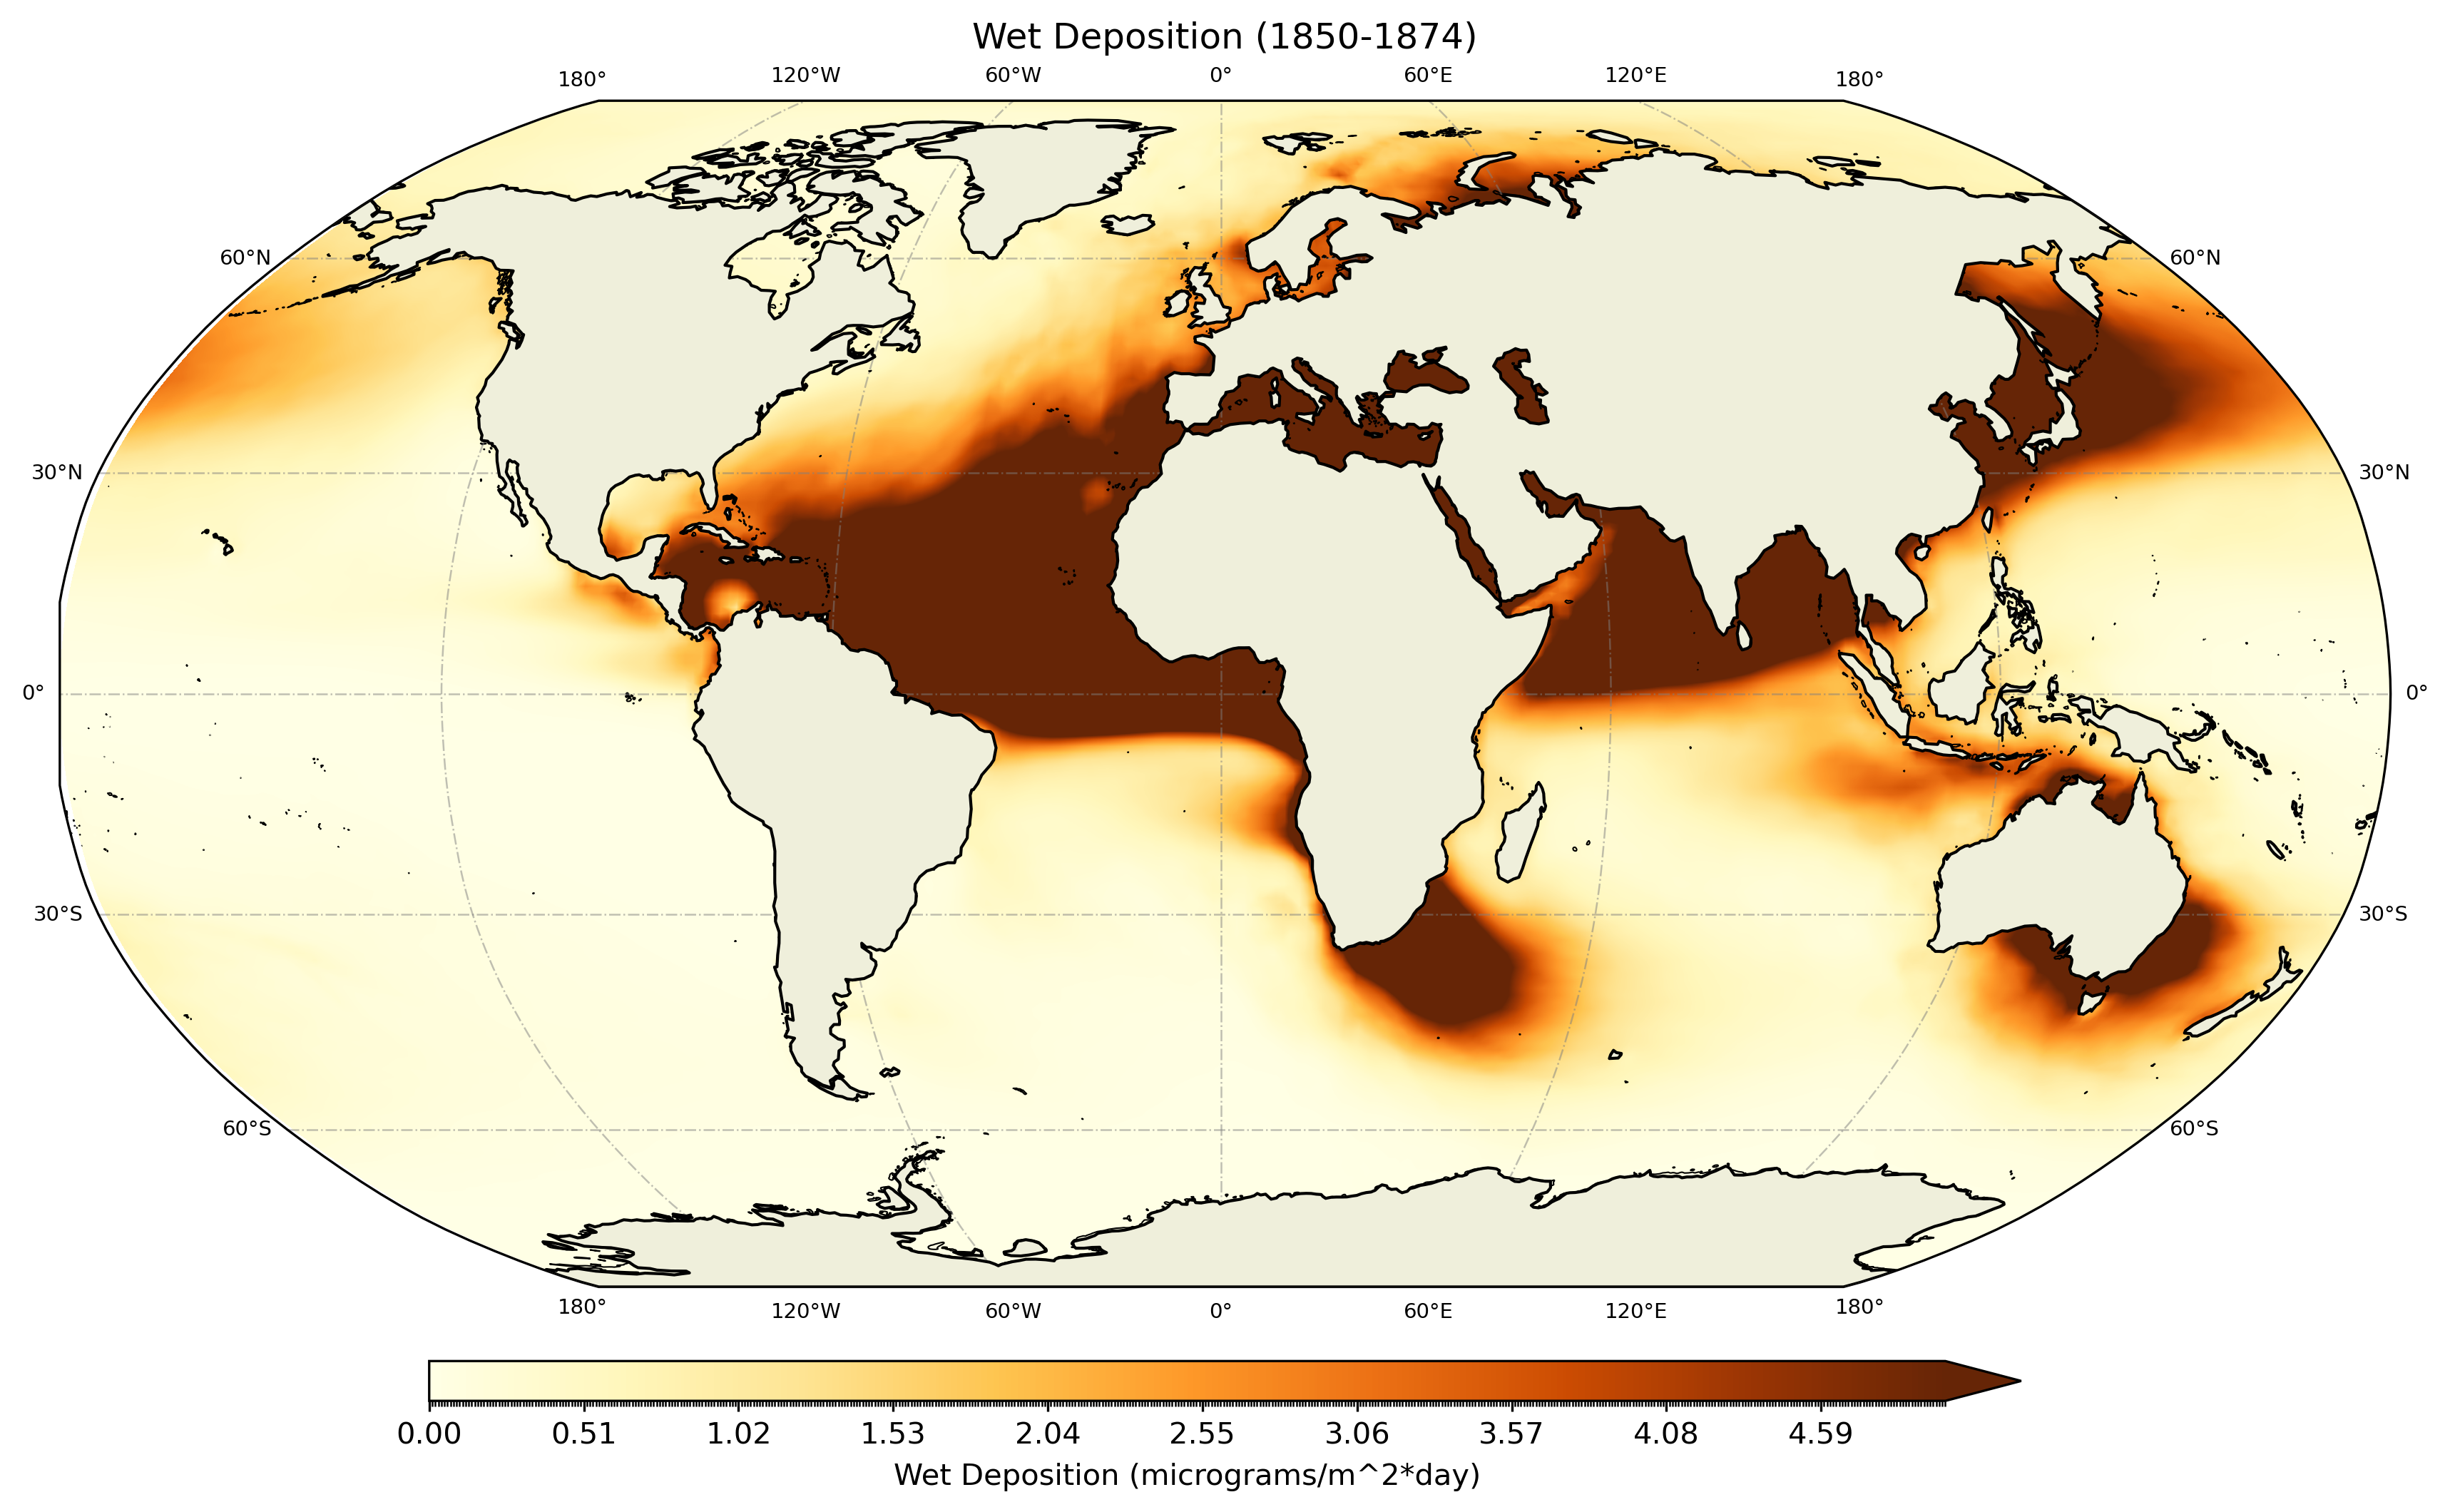

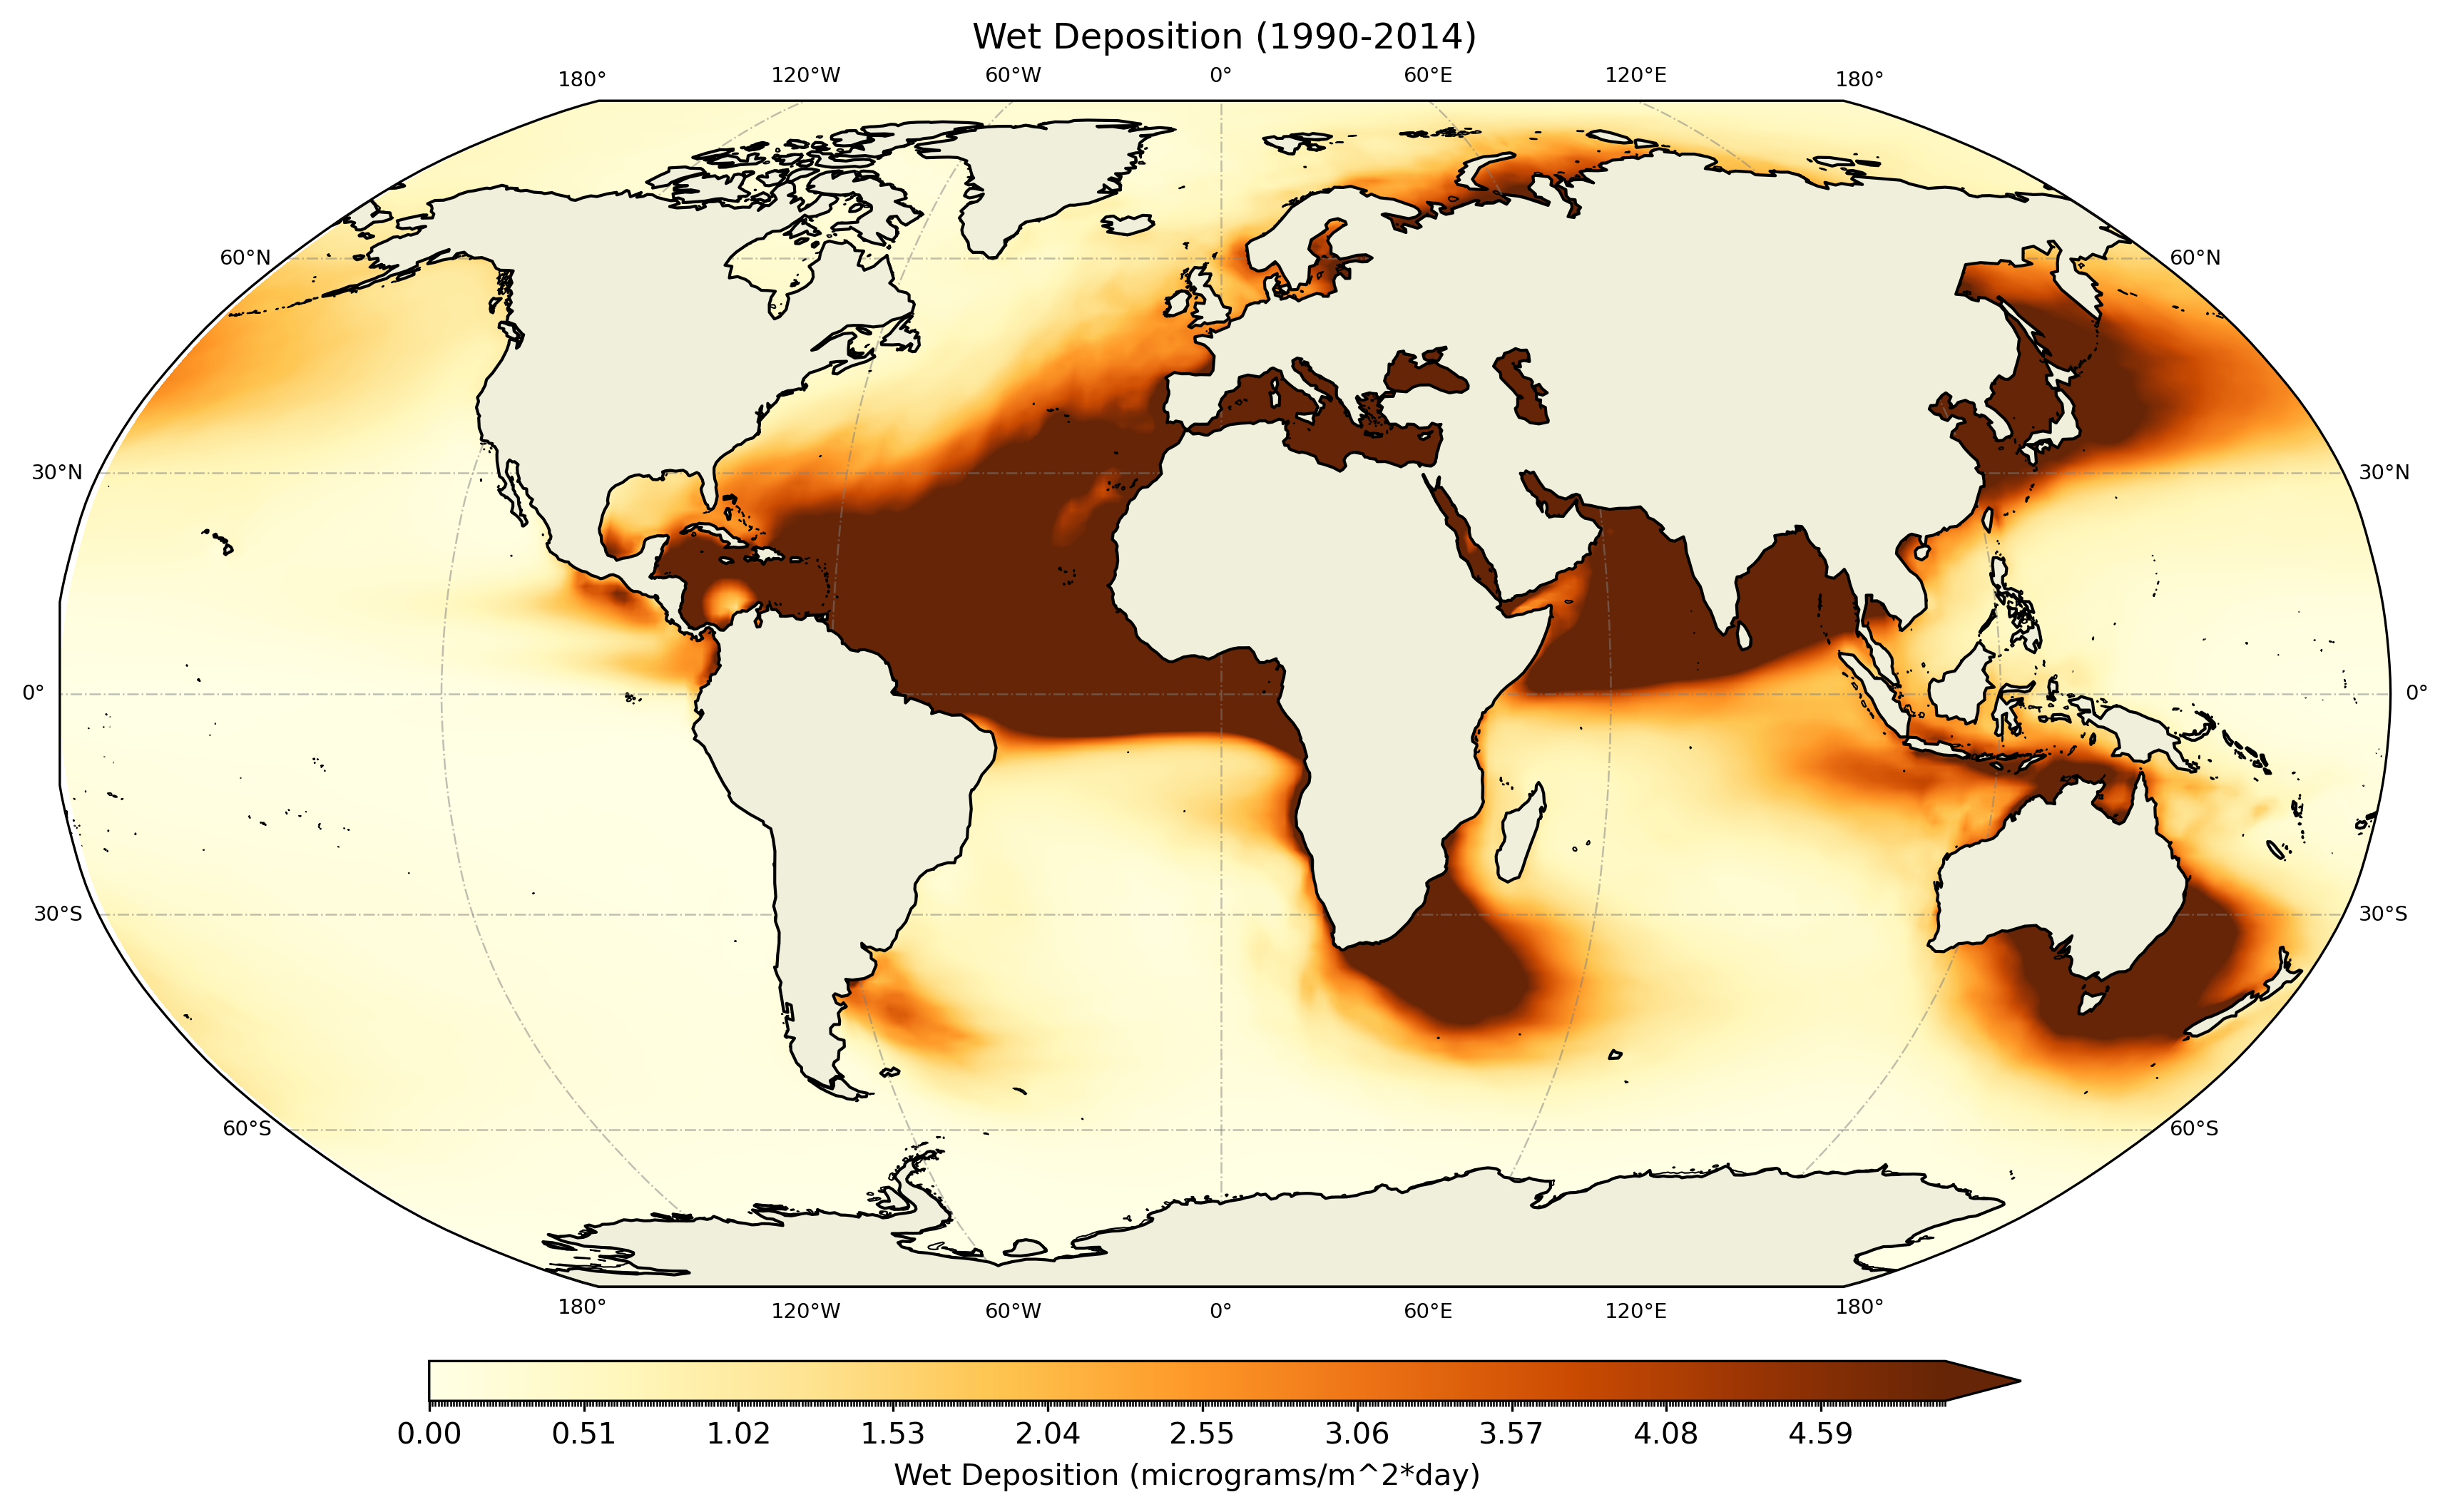

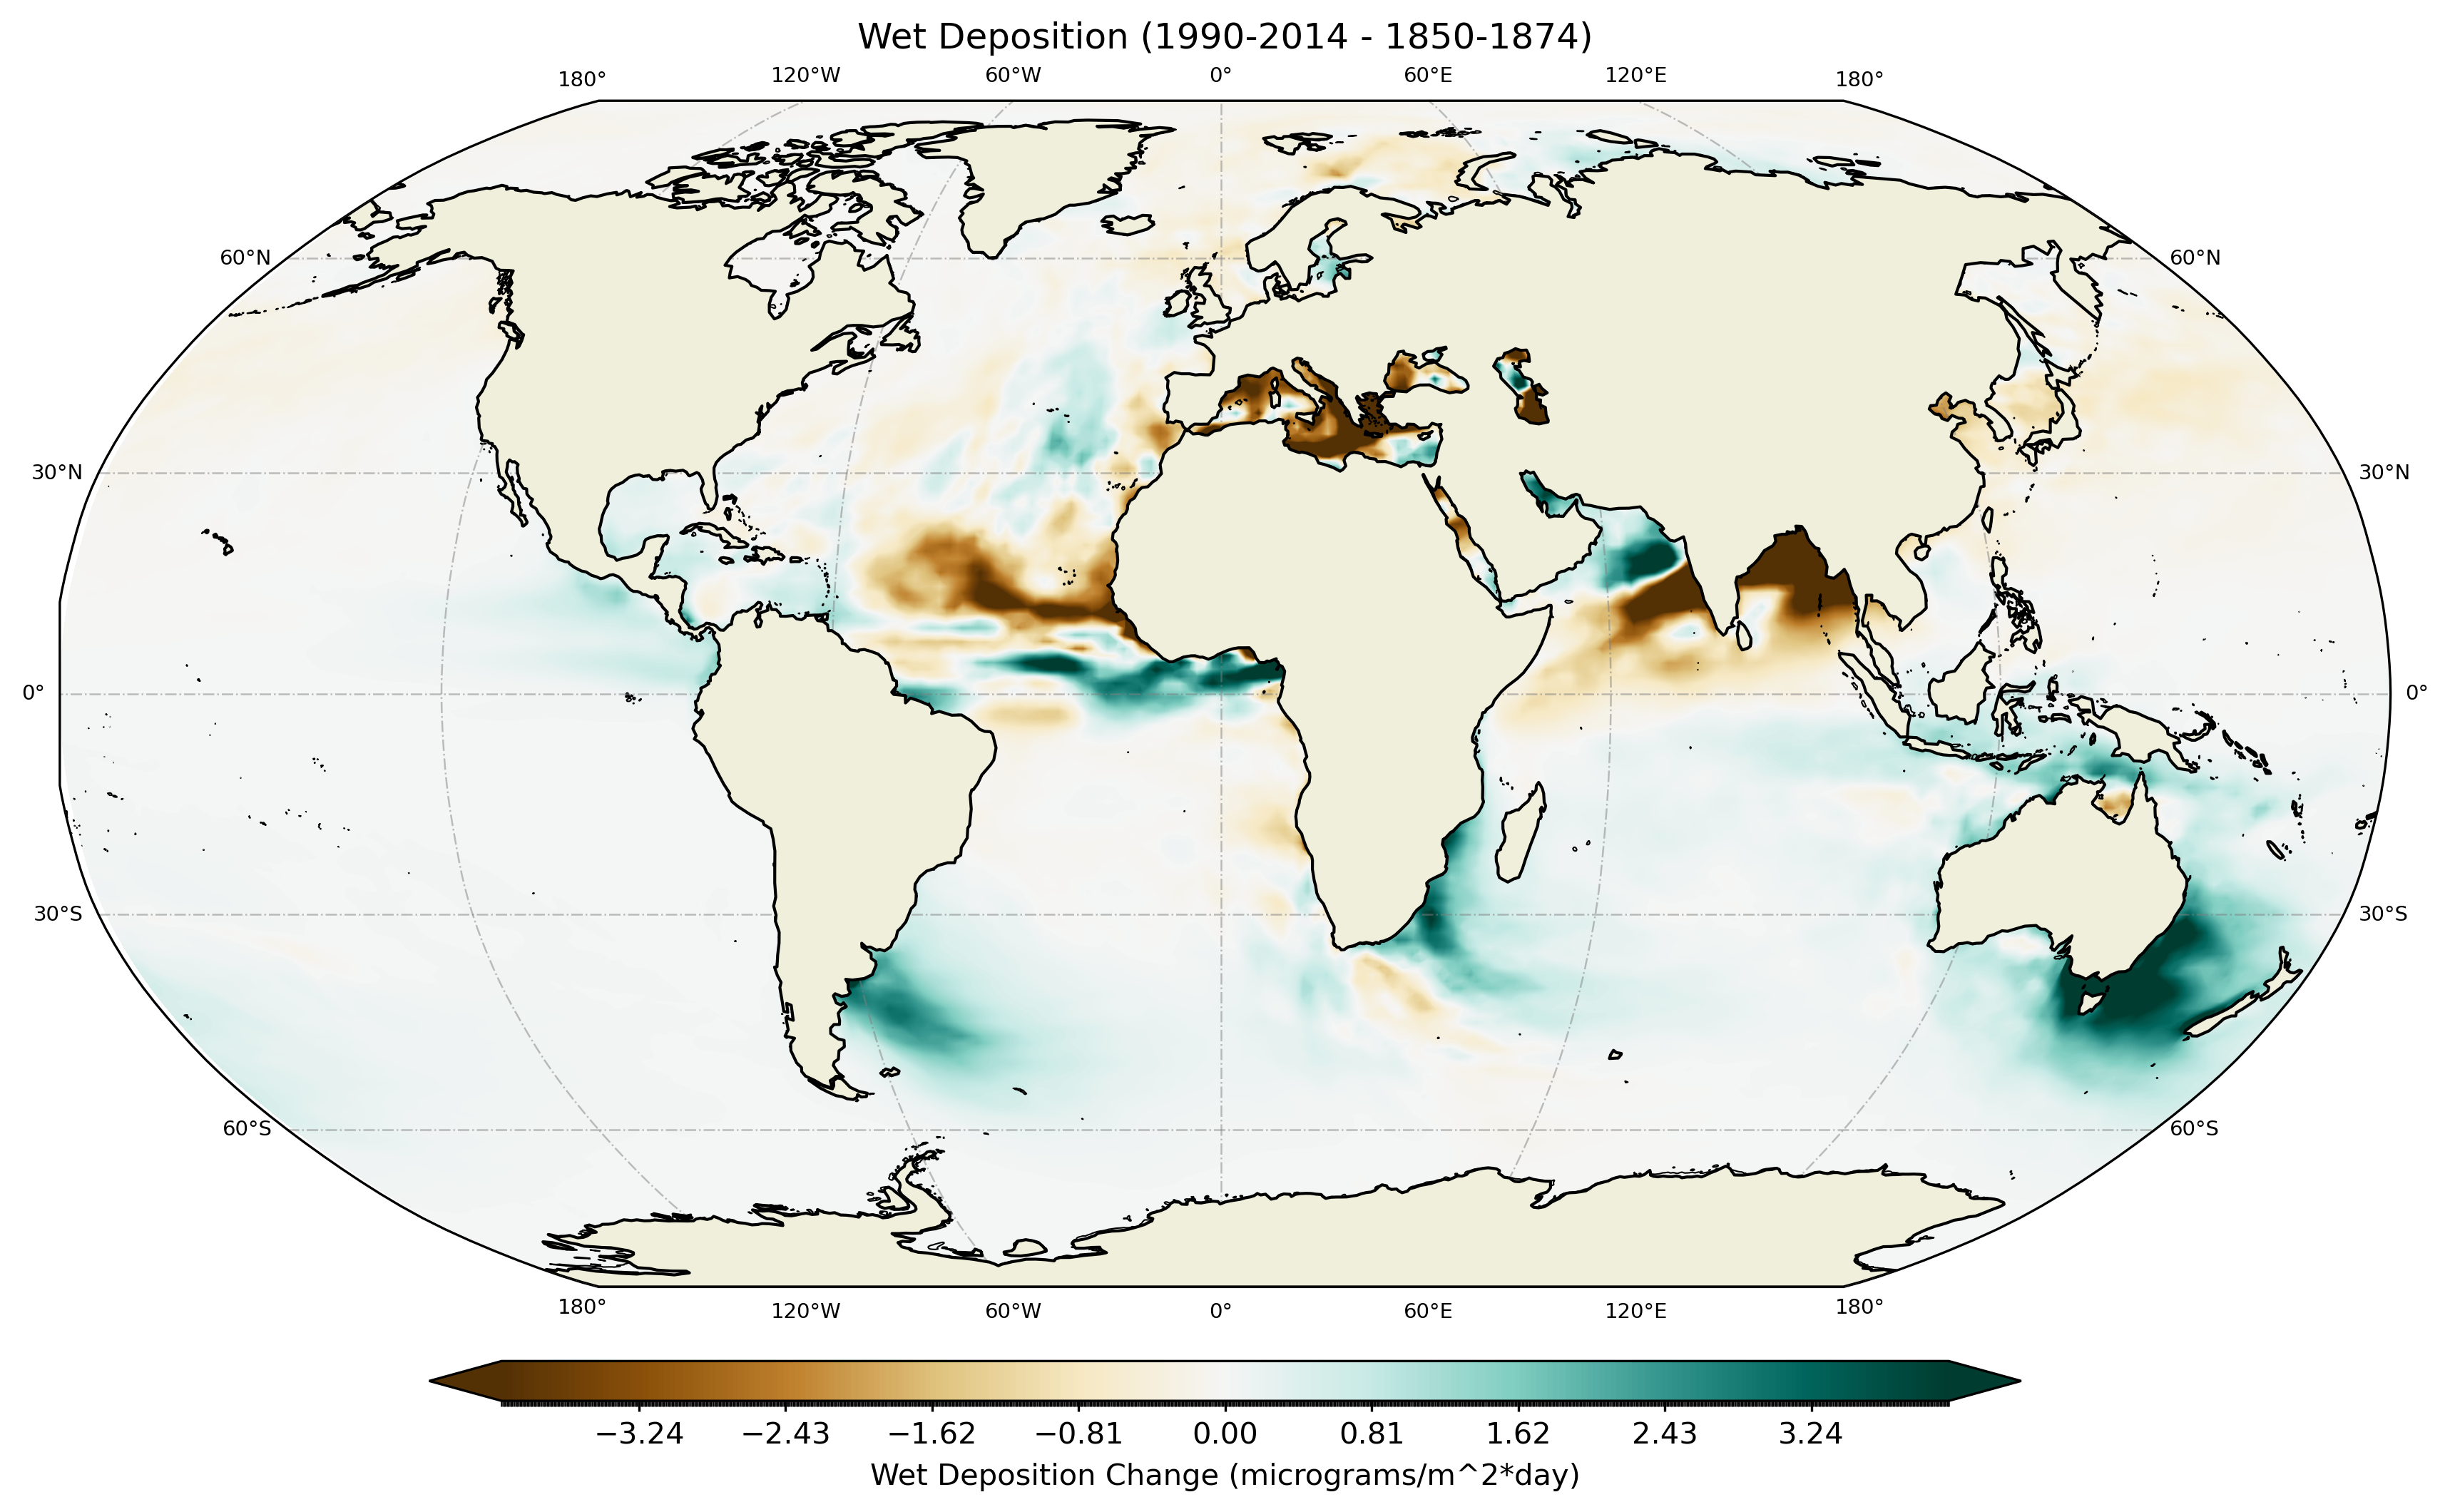

In [6]:
#Wet Deposition Total Maps
pm.map(wetdeptot_1850_1874, "Wet Deposition (1850-1874)", 'Wet Deposition (micrograms/m^2*day)', np.arange(0, 5.01, 0.01),'YlOrBr', 'max', "Mask")
pm.map(wetdeptot_1990_2014, "Wet Deposition (1990-2014)", 'Wet Deposition (micrograms/m^2*day)', np.arange(0, 5.01, 0.01),'YlOrBr', 'max', "Mask")
pm.map(wetdepchangetot, "Wet Deposition (1990-2014 - 1850-1874)", 'Wet Deposition Change (micrograms/m^2*day)', np.arange(-4, 4.01, 0.01),'BrBG', 'both', "Mask")
